Neural Networks are computational graphs representing the formula of the training function.

Training in the neural networks context menas finding the parameter values, or weights, that enter into the formula of the training function via minimizing a loss function. This is similar to training linear regression, which we disscussed [here](https://www.manuelsolan-o.com/blogs/linear_regression/).

The mathematical structure remains the same:
1. Training Function
2. Loss Function
3. Optimization

The only difference is that for other models (linear regression, logistic regression, softmax regression, support vector machines, etc.), the training functions are uncomplicated. They linearly combine the data features, add a bias term ($w_0$), and pass the result into a most one nonlinear functions (for example, the logistic function in logistic regression). As consecuence, the results of these models are also simple: a linear (flat) function for linear regression, and a linear division boundary between different classes in logistic regression, softmax regression and support vector machines. Even when we use use these simple models to represent nonlinear data, such as in the case of polynomial regression (fitting the data into polynomial functions of the features) or support vector machines with the kernel trick, we still end up with linear functions or division boundaries, but these will either be in higher dimensions( for polynomial regression, the dimensions are the features and its powers) or in transformed dimensions (such as when we use the kernel trick with support vector machines).

For neural networks, on the other hand, the process of linearly combining the features, adding a bias term, then passing the result throught a nonlinear function (now called *activation function*) is the computation that happens *only in one neuron*.

This simple process happens over and over again in dozens, hundreds, thousands or sometimes millions of neurons, arranged in layers, where the output of one layer acts as the input of the next layer.

We will discover that after all, neural networks are just one mathematical function

In this blog we will build a simple multilayer perceptron from scratch using the library `Sympy` for symbolic calculations.

In [1]:
from sympy import *

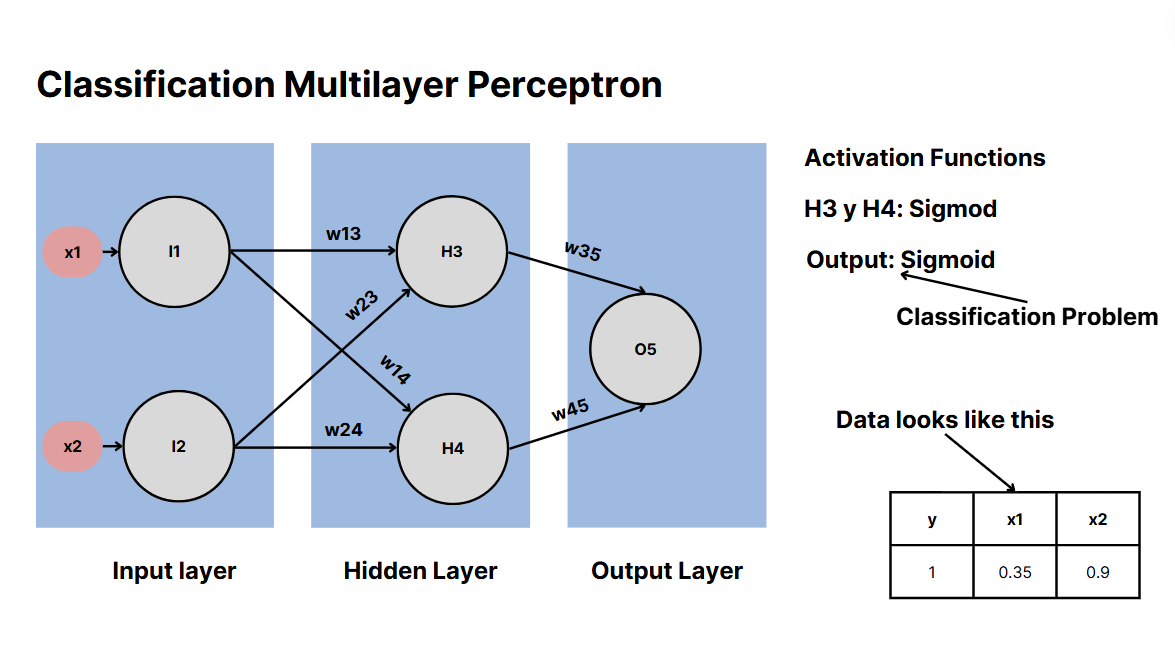

In [47]:
from PIL import Image
from IPython.display import display

img = Image.open('media/graph.png')
display(img)

This this our perceptron's architecture. It has an input layer of two features `x1` and `x2` that will be linearly combined to a hidden layer where the activation functions are the sigmoid function.

$$\text{Sigmoid Function: } \sigma(z) = \frac{1}{1 + e^{-z}}$$

In the last neuron, the activation function is the sigmoid function too, that means that the output will be a nomber between 0 and 1, giving us a probability. Thus, this is a classification artifitial neural network. 

In [4]:
# Features
x1 = 0.35
x2 = 0.9

# Weights and bias
w13 = symbols('w13')
w14 = symbols('w14')
w23 = symbols('w23')
w24 = symbols('w24')
w35 = symbols('w35')
w45 = symbols('w45')
w0 = symbols('w0') # Bias

# Input Layer ----------------------------------------------------------------------------------------
x1 = 0.35
x2 = 0.9

# Hidden Layer ---------------------------------------------------------------------------------------
# Neuron 3
z3 = (x1*w13+w0) + (x2*w23+w0)

# Activation function
f3 = 1 / (1+e**(-z3))

# Neuron 4
z4 = (x1*w14+w0) + (x2*w24+w0)

# Activation function
f4 = 1 / (1+e**(-z4))

# Output Layer ---------------------------------------------------------------------------------------
# Neuron 5 
z5 = (f3*w35+w0) + (f4*w45+w0)

# Activation function
f5 = 1 / (1+e**(-z5))

### Training Function (Model)

After all the linear combinations and passing them to the activation function we end up with just one mathematical function that represent our training function

In [18]:
f5

1/(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1)

### Loss Function

Given that our output function is the sigmoid function, our loss function will be the binary cross entropy loss function

In [9]:
# Loss Function (Binary Cross Entropy)
y_true = 1

L = -y_true*log(f5) - (1-y_true)*log(1-f5)

In [19]:
L

-log(1/(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1))

### Optimization: Gradient Descent $\vec{w}^{i+1} = \vec{w}^{i} - \eta \nabla L(\vec{w}^{i})$

In order to calculate the gradient descent we need to calcultate the partial derivative of the Loss Function with respect of each weight and bias. 

To get a deeper view on how to do the gradient descent check out this [blog](https://www.manuelsolan-o.com/blogs/gradient_descend_sse/)

### Partial Derivatives

In [11]:
dL_w0 = diff(L, w0)
dL_w0

2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1))*(-2.0*2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23)*w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1)**2 - 2.0*2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24)*w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)**2 - 2.0)/(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1)

In [12]:
dL_w13 = diff(L, w13)
dL_w13

-0.35*2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23)*2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1))*w35/((2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1)**2*(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1))

In [13]:
dL_w14 = diff(L, w14)
dL_w14

-0.35*2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24)*2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1))*w45/((2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)**2*(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1))

In [14]:
dL_w23 = diff(L, w23)
dL_w23

-0.9*2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23)*2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1))*w35/((2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1)**2*(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1))

In [15]:
dL_w24 = diff(L, w24)
dL_w24

-0.9*2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24)*2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1))*w45/((2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)**2*(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1))

In [16]:
dL_w35 = diff(L, w35)
dL_w35

-1.0*2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1))/((2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1)*(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1))

In [17]:
dL_w45 = diff(L, w45)
dL_w45

-1.0*2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1))/((2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)*(2.71828182845905**(-2*w0 - w35/(2.71828182845905**(-2*w0 - 0.35*w13 - 0.9*w23) + 1) - w45/(2.71828182845905**(-2*w0 - 0.35*w14 - 0.9*w24) + 1)) + 1))

### Gradient Descent automatization

In [43]:
# Optimize for w's
learning_rate = 0.3

# Random Values for Weights and bias
w0_i = 0.1
w13_i = 0.2
w14_i = 0.8
w23_i = 0.6
w24_i = 0.4
w35_i = 0.1
w45_i = 0.5

i = 1
step_size_w0 = 1
step_size_w13 = 1
step_size_w14 = 1
step_size_w23 = 1
step_size_w24 = 1
step_size_w35 = 1
step_size_w45 = 1

def update_w0(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i):
    slope_w0 = dL_w0.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})
    step_size_w0 = learning_rate * slope_w0
    updated_w0 = w0_i - step_size_w0
    w0_i = updated_w0
    return w0_i, step_size_w0

def update_w13(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i):
    slope_w0 = dL_w13.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})
    step_size_w0 = learning_rate * slope_w0
    updated_w0 = w13_i - step_size_w0
    w0_i = updated_w0
    return w0_i, step_size_w0

def update_w14(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i):
    slope_w0 = dL_w14.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})
    step_size_w0 = learning_rate * slope_w0
    updated_w0 = w14_i - step_size_w0
    w0_i = updated_w0
    return w0_i, step_size_w0

def update_w23(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i):
    slope_w0 = dL_w23.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})
    step_size_w0 = learning_rate * slope_w0
    updated_w0 = w23_i - step_size_w0
    w0_i = updated_w0
    return w0_i, step_size_w0

def update_w24(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i):
    slope_w0 = dL_w24.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})
    step_size_w0 = learning_rate * slope_w0
    updated_w0 = w24_i - step_size_w0
    w0_i = updated_w0
    return w0_i, step_size_w0

def update_w35(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i):
    slope_w0 = dL_w35.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})
    step_size_w0 = learning_rate * slope_w0
    updated_w0 = w35_i - step_size_w0
    w0_i = updated_w0
    return w0_i, step_size_w0

def update_w45(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i):
    slope_w0 = dL_w45.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})
    step_size_w0 = learning_rate * slope_w0
    updated_w0 = w45_i - step_size_w0
    w0_i = updated_w0
    return w0_i, step_size_w0

### Results of random parameters

In [44]:
f5.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})

0.649864477526152

In [38]:
stop_criteria = abs(step_size_w0) >= 0.001 or abs(step_size_w13) >= 0.001 or abs(step_size_w14) >= 0.001 or  abs(step_size_w23) >= 0.001 or  abs(step_size_w24) >= 0.001 or abs(step_size_w35) >= 0.001 or abs(step_size_w45) >= 0.001

In [41]:
while stop_criteria and i != 1000:
    w0_i, step_w0 = update_w0(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i)
    w13_i, step_w13 = update_w13(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i)
    w14_i, step_w14 = update_w14(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i)
    w23_i, step_w23 = update_w23(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i)
    w24_i, step_w24 = update_w24(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i)
    w35_i, step_w35 = update_w35(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i)
    w45_i, step_w45 = update_w45(w0_i, w13_i, w14_i, w23_i, w24_i, w35_i, w45_i)
    
    print(f'''Iteration: {i} 
    StepSize_w0: {step_w0}
    New w0: {w0_i}
    
    StepSize_w13: {step_size_w13}
    New w13: {w13_i}
    
    StepSize_w14: {step_size_w14}
    New w14: {w14_i}
    
    StepSize_w23: {step_size_w23}
    New w13: {w23_i}
    
    StepSize_w24: {step_size_w24}
    New w24: {w24_i}
    
    StepSize_w35: {step_size_w35}
    New w35: {w35_i}
    
    StepSize_w45: {step_size_w45}
    New w45: {w45_i}
    
    ''')
    i += 1

Iteration: 1 
    StepSize_w0: -0.236680795304567
    New w0: 0.336680795304567
    
    StepSize_w13: 1
    New w13: 0.200430419883873
    
    StepSize_w14: 1
    New w14: 0.802115536760342
    
    StepSize_w23: 1
    New w13: 0.601106645552023
    
    StepSize_w24: 1
    New w24: 0.405437306142746
    
    StepSize_w35: 1
    New w35: 0.156670139152261
    
    StepSize_w45: 1
    New w45: 0.555189050552196
    
    
Iteration: 2 
    StepSize_w0: -0.151377734074111
    New w0: 0.488058529378678
    
    StepSize_w13: 1
    New w13: 0.200829796275598
    
    StepSize_w14: 1
    New w14: 0.803498693847645
    
    StepSize_w23: 1
    New w13: 0.602133484520197
    
    StepSize_w24: 1
    New w24: 0.408992673149007
    
    StepSize_w35: 1
    New w35: 0.199568229031754
    
    StepSize_w45: 1
    New w45: 0.597095842768054
    
    
Iteration: 3 
    StepSize_w0: -0.108150443652332
    New w0: 0.596208973031011
    
    StepSize_w13: 1
    New w13: 0.201166615824564
    
    Ste

Iteration: 21 
    StepSize_w0: -0.0160630591688960
    New w0: 1.20913666821101
    
    StepSize_w13: 1
    New w13: 0.203325580612121
    
    StepSize_w14: 1
    New w14: 0.809113085079968
    
    StepSize_w23: 1
    New w13: 0.608550833345614
    
    StepSize_w24: 1
    New w24: 0.423427485855372
    
    StepSize_w35: 1
    New w35: 0.472764382412838
    
    StepSize_w45: 1
    New w45: 0.867184198964444
    
    
Iteration: 22 
    StepSize_w0: -0.0153226734164913
    New w0: 1.22445934162750
    
    StepSize_w13: 1
    New w13: 0.203374943811712
    
    StepSize_w14: 1
    New w14: 0.809199953627073
    
    StepSize_w23: 1
    New w13: 0.608677765113161
    
    StepSize_w24: 1
    New w24: 0.423650855171255
    
    StepSize_w35: 1
    New w35: 0.479474915791590
    
    StepSize_w45: 1
    New w45: 0.873866053532308
    
    
Iteration: 23 
    StepSize_w0: -0.0146471267784618
    New w0: 1.23910646840597
    
    StepSize_w13: 1
    New w13: 0.203421642833385
    
    

Iteration: 41 
    StepSize_w0: -0.00815409276426079
    New w0: 1.42987364098436
    
    StepSize_w13: 1
    New w13: 0.203982909995431
    
    StepSize_w14: 1
    New w14: 0.810224108899526
    
    StepSize_w23: 1
    New w13: 0.610241088380643
    
    StepSize_w24: 1
    New w24: 0.426284342856470
    
    StepSize_w35: 1
    New w35: 0.571616389783999
    
    StepSize_w45: 1
    New w45: 0.965723961148359
    
    
Iteration: 42 
    StepSize_w0: -0.00795773263142532
    New w0: 1.43783137361578
    
    StepSize_w13: 1
    New w13: 0.204004340521744
    
    StepSize_w14: 1
    New w14: 0.810258758452461
    
    StepSize_w23: 1
    New w13: 0.610296195035207
    
    StepSize_w24: 1
    New w24: 0.426373440587733
    
    StepSize_w35: 1
    New w35: 0.575257549791235
    
    StepSize_w45: 1
    New w45: 0.969357308285817
    
    
Iteration: 43 
    StepSize_w0: -0.00777058641820560
    New w0: 1.44560196003399
    
    StepSize_w13: 1
    New w13: 0.204025110208729
    
 

Iteration: 61 
    StepSize_w0: -0.00545835226325791
    New w0: 1.56107775248549
    
    StepSize_w13: 1
    New w13: 0.204315490197953
    
    StepSize_w14: 1
    New w14: 0.810751467638569
    
    StepSize_w23: 1
    New w13: 0.611096289518046
    
    StepSize_w24: 1
    New w24: 0.427640394854103
    
    StepSize_w35: 1
    New w35: 0.632210047804448
    
    StepSize_w45: 1
    New w45: 1.02621146701622
    
    
Iteration: 62 
    StepSize_w0: -0.00536954788214367
    New w0: 1.56644730036764
    
    StepSize_w13: 1
    New w13: 0.204328163449666
    
    StepSize_w14: 1
    New w14: 0.810771133158959
    
    StepSize_w23: 1
    New w13: 0.611128877734755
    
    StepSize_w24: 1
    New w24: 0.427690962973906
    
    StepSize_w35: 1
    New w35: 0.634713397351015
    
    StepSize_w45: 1
    New w45: 1.02871138745611
    
    
Iteration: 63 
    StepSize_w0: -0.00528358456211884
    New w0: 1.57173088492976
    
    StepSize_w13: 1
    New w13: 0.204340562511781
    
   

Iteration: 81 
    StepSize_w0: -0.00410148226880303
    New w0: 1.65471239778695
    
    StepSize_w13: 1
    New w13: 0.204526119639279
    
    StepSize_w14: 1
    New w14: 0.811074322877677
    
    StepSize_w23: 1
    New w13: 0.611637906054874
    
    StepSize_w24: 1
    New w24: 0.428470589103038
    
    StepSize_w35: 1
    New w35: 0.676096128987398
    
    StepSize_w45: 1
    New w45: 1.07004608014904
    
    
Iteration: 82 
    StepSize_w0: -0.00405112500101816
    New w0: 1.65876352278797
    
    StepSize_w13: 1
    New w13: 0.204534742259619
    
    StepSize_w14: 1
    New w14: 0.811087360494118
    
    StepSize_w23: 1
    New w13: 0.611660078440050
    
    StepSize_w24: 1
    New w24: 0.428504114243728
    
    StepSize_w35: 1
    New w35: 0.678005416415104
    
    StepSize_w45: 1
    New w45: 1.07195350530653
    
    
Iteration: 83 
    StepSize_w0: -0.00400198920282919
    New w0: 1.66276551199080
    
    StepSize_w13: 1
    New w13: 0.204543220985338
    
   

Iteration: 101 
    StepSize_w0: -0.00328485137852325
    New w0: 1.72756547272990
    
    StepSize_w13: 1
    New w13: 0.204675141444373
    
    StepSize_w14: 1
    New w14: 0.811297686903037
    
    StepSize_w23: 1
    New w13: 0.612021103971654
    
    StepSize_w24: 1
    New w24: 0.429044951390450
    
    StepSize_w35: 1
    New w35: 0.710552764805583
    
    StepSize_w45: 1
    New w45: 1.10447313035885
    
    
Iteration: 102 
    StepSize_w0: -0.00325247352381901
    New w0: 1.73081794625372
    
    StepSize_w13: 1
    New w13: 0.204681500154895
    
    StepSize_w14: 1
    New w14: 0.811307125507094
    
    StepSize_w23: 1
    New w13: 0.612037454905040
    
    StepSize_w24: 1
    New w24: 0.429069222003470
    
    StepSize_w35: 1
    New w35: 0.712096791292106
    
    StepSize_w45: 1
    New w45: 1.10601601513327
    
    
Iteration: 103 
    StepSize_w0: -0.00322072793961435
    New w0: 1.73403867419334
    
    StepSize_w13: 1
    New w13: 0.204687772419288
    


Iteration: 121 
    StepSize_w0: -0.00273947389338910
    New w0: 1.78720701459538
    
    StepSize_w13: 1
    New w13: 0.204787856361954
    
    StepSize_w14: 1
    New w14: 0.811463881811514
    
    StepSize_w23: 1
    New w13: 0.612310941754136
    
    StepSize_w24: 1
    New w24: 0.429472308430757
    
    StepSize_w35: 1
    New w35: 0.738938107600501
    
    StepSize_w45: 1
    New w45: 1.13283965564215
    
    
Iteration: 122 
    StepSize_w0: -0.00271692185913732
    New w0: 1.78992393645452
    
    StepSize_w13: 1
    New w13: 0.204792797879196
    
    StepSize_w14: 1
    New w14: 0.811471113949667
    
    StepSize_w23: 1
    New w13: 0.612323648490690
    
    StepSize_w24: 1
    New w24: 0.429490905308679
    
    StepSize_w35: 1
    New w35: 0.740234686836133
    
    StepSize_w45: 1
    New w45: 1.13413547790340
    
    
Iteration: 123 
    StepSize_w0: -0.00269473832855552
    New w0: 1.79261867478307
    
    StepSize_w13: 1
    New w13: 0.204797682686116
    


Iteration: 141 
    StepSize_w0: -0.00234947378094417
    New w0: 1.83770236056866
    
    StepSize_w13: 1
    New w13: 0.204877020713440
    
    StepSize_w14: 1
    New w14: 0.811593681208101
    
    StepSize_w23: 1
    New w13: 0.612540221154446
    
    StepSize_w24: 1
    New w24: 0.429806077519375
    
    StepSize_w35: 1
    New w35: 0.763082510799427
    
    StepSize_w45: 1
    New w45: 1.15697125762002
    
    
Iteration: 142 
    StepSize_w0: -0.00233286998731579
    New w0: 1.84003523055597
    
    StepSize_w13: 1
    New w13: 0.204881005148555
    
    StepSize_w14: 1
    New w14: 0.811599447035978
    
    StepSize_w23: 1
    New w13: 0.612550466830392
    
    StepSize_w24: 1
    New w24: 0.429820903902956
    
    StepSize_w35: 1
    New w35: 0.764200298336895
    
    StepSize_w45: 1
    New w45: 1.15808851505471
    
    
Iteration: 143 
    StepSize_w0: -0.00231649941126782
    New w0: 1.84235172996724
    
    StepSize_w13: 1
    New w13: 0.204884950004739
    


Iteration: 161 
    StepSize_w0: -0.00205673652080355
    New w0: 1.88148853578528
    
    StepSize_w13: 1
    New w13: 0.204949868563864
    
    StepSize_w14: 1
    New w14: 0.811698632337298
    
    StepSize_w23: 1
    New w13: 0.612727543957843
    
    StepSize_w24: 1
    New w24: 0.430075951337245
    
    StepSize_w35: 1
    New w35: 0.784094902605201
    
    StepSize_w45: 1
    New w45: 1.17797451336352
    
    
Iteration: 162 
    StepSize_w0: -0.00204400422973498
    New w0: 1.88353254001502
    
    StepSize_w13: 1
    New w13: 0.204953170466648
    
    StepSize_w14: 1
    New w14: 0.811703365968065
    
    StepSize_w23: 1
    New w13: 0.612736034555146
    
    StepSize_w24: 1
    New w24: 0.430088123509798
    
    StepSize_w35: 1
    New w35: 0.785077421722767
    
    StepSize_w45: 1
    New w45: 1.17895664599671
    
    
Iteration: 163 
    StepSize_w0: -0.00203142875226393
    New w0: 1.88556396876728
    
    StepSize_w13: 1
    New w13: 0.204956443447874
    


Iteration: 181 
    StepSize_w0: -0.00182891209654551
    New w0: 1.92014213293599
    
    StepSize_w13: 1
    New w13: 0.205010853723590
    
    StepSize_w14: 1
    New w14: 0.811785733077832
    
    StepSize_w23: 1
    New w13: 0.612884362771501
    
    StepSize_w24: 1
    New w24: 0.430299924316359
    
    StepSize_w35: 1
    New w35: 0.802698501449546
    
    StepSize_w45: 1
    New w45: 1.19657135402996
    
    
Iteration: 182 
    StepSize_w0: -0.00181883966797062
    New w0: 1.92196097260397
    
    StepSize_w13: 1
    New w13: 0.205013648488671
    
    StepSize_w14: 1
    New w14: 0.811789707996005
    
    StepSize_w23: 1
    New w13: 0.612891549303221
    
    StepSize_w24: 1
    New w24: 0.430310145519829
    
    StepSize_w35: 1
    New w35: 0.803575084141209
    
    StepSize_w45: 1
    New w45: 1.19744764612937
    
    
Iteration: 183 
    StepSize_w0: -0.00180887768750687
    New w0: 1.92376985029147
    
    StepSize_w13: 1
    New w13: 0.205016421356737
    


Iteration: 201 
    StepSize_w0: -0.00164656348784997
    New w0: 1.95474199020707
    
    StepSize_w13: 1
    New w13: 0.205062890543401
    
    StepSize_w14: 1
    New w14: 0.811859503563569
    
    StepSize_w23: 1
    New w13: 0.613018171614102
    
    StepSize_w24: 1
    New w24: 0.430489619597742
    
    StepSize_w35: 1
    New w35: 0.819391377911764
    
    StepSize_w45: 1
    New w45: 1.21325909076104
    
    
Iteration: 202 
    StepSize_w0: -0.00163839674636544
    New w0: 1.95638038695343
    
    StepSize_w13: 1
    New w13: 0.205065296210359
    
    StepSize_w14: 1
    New w14: 0.811862901687829
    
    StepSize_w23: 1
    New w13: 0.613024357609621
    
    StepSize_w24: 1
    New w24: 0.430498357620827
    
    StepSize_w35: 1
    New w35: 0.820182734223845
    
    StepSize_w45: 1
    New w45: 1.21405022322028
    
    
Iteration: 203 
    StepSize_w0: -0.00163031070355540
    New w0: 1.95801069765699
    
    StepSize_w13: 1
    New w13: 0.205067684824181
    


Iteration: 221 
    StepSize_w0: -0.00149730898228063
    New w0: 1.98605889379027
    
    StepSize_w13: 1
    New w13: 0.205107977960462
    
    StepSize_w14: 1
    New w14: 0.811923010486157
    
    StepSize_w23: 1
    New w13: 0.613134110594515
    
    StepSize_w24: 1
    New w24: 0.430652922925417
    
    StepSize_w35: 1
    New w35: 0.834531256018895
    
    StepSize_w45: 1
    New w45: 1.22839497304169
    
    
Iteration: 222 
    StepSize_w0: -0.00149055407744603
    New w0: 1.98754944786771
    
    StepSize_w13: 1
    New w13: 0.205110077301826
    
    StepSize_w14: 1
    New w14: 0.811925958117966
    
    StepSize_w23: 1
    New w13: 0.613139508896896
    
    StepSize_w24: 1
    New w24: 0.430660502542004
    
    StepSize_w35: 1
    New w35: 0.835252554256884
    
    StepSize_w45: 1
    New w45: 1.22911609544662
    
    
Iteration: 223 
    StepSize_w0: -0.00148385991457133
    New w0: 1.98903330778229
    
    StepSize_w13: 1
    New w13: 0.205112163053529
    


Iteration: 241 
    StepSize_w0: -0.00137288759044585
    New w0: 2.01466272688927
    
    StepSize_w13: 1
    New w13: 0.205147539462361
    
    StepSize_w14: 1
    New w14: 0.811978417313733
    
    StepSize_w23: 1
    New w13: 0.613235840099990
    
    StepSize_w24: 1
    New w24: 0.430795397482287
    
    StepSize_w35: 1
    New w35: 0.848383785845885
    
    StepSize_w45: 1
    New w45: 1.24224434056610
    
    
Iteration: 242 
    StepSize_w0: -0.00136720765782051
    New w0: 2.01602993454709
    
    StepSize_w13: 1
    New w13: 0.205149392484685
    
    StepSize_w14: 1
    New w14: 0.811981005226868
    
    StepSize_w23: 1
    New w13: 0.613240605011434
    
    StepSize_w24: 1
    New w24: 0.430802052109851
    
    StepSize_w35: 1
    New w35: 0.849046469434490
    
    StepSize_w45: 1
    New w45: 1.24290688382592
    
    
Iteration: 243 
    StepSize_w0: -0.00136157458389400
    New w0: 2.01739150913098
    
    StepSize_w13: 1
    New w13: 0.205151234468609
    


Iteration: 261 
    StepSize_w0: -0.00126757657973866
    New w0: 2.04098674022450
    
    StepSize_w13: 1
    New w13: 0.205182620285747
    
    StepSize_w14: 1
    New w14: 0.812027299667517
    
    StepSize_w23: 1
    New w13: 0.613326047875866
    
    StepSize_w24: 1
    New w24: 0.430921094852545
    
    StepSize_w35: 1
    New w35: 0.861151685712626
    
    StepSize_w45: 1
    New w45: 1.25500970095006
    
    
Iteration: 262 
    StepSize_w0: -0.00126273398351528
    New w0: 2.04224947420801
    
    StepSize_w13: 1
    New w13: 0.205184271704911
    
    StepSize_w14: 1
    New w14: 0.812029594990990
    
    StepSize_w23: 1
    New w13: 0.613330294379823
    
    StepSize_w24: 1
    New w24: 0.430926997108022
    
    StepSize_w35: 1
    New w35: 0.861764601539091
    
    StepSize_w45: 1
    New w45: 1.25562250330090
    
    
Iteration: 263 
    StepSize_w0: -0.00125792829096034
    New w0: 2.04350740249897
    
    StepSize_w13: 1
    New w13: 0.205185914012317
    


Iteration: 281 
    StepSize_w0: -0.00117728619112018
    New w0: 2.06536801581666
    
    StepSize_w13: 1
    New w13: 0.205214007752299
    
    StepSize_w14: 1
    New w14: 0.812070835801197
    
    StepSize_w23: 1
    New w13: 0.613406758459571
    
    StepSize_w24: 1
    New w24: 0.431033044822683
    
    StepSize_w35: 1
    New w35: 0.872993189856433
    
    StepSize_w45: 1
    New w45: 1.26684914090296
    
    
Iteration: 282 
    StepSize_w0: -0.00117310850807106
    New w0: 2.06654112432473
    
    StepSize_w13: 1
    New w13: 0.205215491669885
    
    StepSize_w14: 1
    New w14: 0.812072889382603
    
    StepSize_w23: 1
    New w13: 0.613410574245658
    
    StepSize_w24: 1
    New w24: 0.431038325456680
    
    StepSize_w35: 1
    New w35: 0.873563319235947
    
    StepSize_w45: 1
    New w45: 1.26741917751047
    
    
Iteration: 283 
    StepSize_w0: -0.00116896040528962
    New w0: 2.06771008473002
    
    StepSize_w13: 1
    New w13: 0.205216967961692
    


Iteration: 301 
    StepSize_w0: -0.00109901598497406
    New w0: 2.08807397932576
    
    StepSize_w13: 1
    New w13: 0.205242307841617
    
    StepSize_w14: 1
    New w14: 0.812109926717585
    
    StepSize_w23: 1
    New w13: 0.613479530081589
    
    StepSize_w24: 1
    New w24: 0.431133564251157
    
    StepSize_w35: 1
    New w35: 0.884034192257459
    
    StepSize_w45: 1
    New w45: 1.27788844838030
    
    
Iteration: 302 
    StepSize_w0: -0.00109537507850630
    New w0: 2.08916935440426
    
    StepSize_w13: 1
    New w13: 0.205243650782813
    
    StepSize_w14: 1
    New w14: 0.812111777866476
    
    StepSize_w23: 1
    New w13: 0.613482983357318
    
    StepSize_w24: 1
    New w24: 0.431138324345135
    
    StepSize_w35: 1
    New w35: 0.884567141460235
    
    StepSize_w45: 1
    New w45: 1.27842132103800
    
    
Iteration: 303 
    StepSize_w0: -0.00109175824537448
    New w0: 2.09026111264964
    
    StepSize_w13: 1
    New w13: 0.205244987265312
    


Iteration: 321 
    StepSize_w0: -0.00103051481143686
    New w0: 2.10932036245986
    
    StepSize_w13: 1
    New w13: 0.205267995662645
    
    StepSize_w14: 1
    New w14: 0.812145274708107
    
    StepSize_w23: 1
    New w13: 0.613545584448670
    
    StepSize_w24: 1
    New w24: 0.431224459026072
    
    StepSize_w35: 1
    New w35: 0.894376507839136
    
    StepSize_w45: 1
    New w45: 1.28822936038803
    
    
Iteration: 322 
    StepSize_w0: -0.00102731347498474
    New w0: 2.11034767593485
    
    StepSize_w13: 1
    New w13: 0.205269218613980
    
    StepSize_w14: 1
    New w14: 0.812146954353870
    
    StepSize_w23: 1
    New w13: 0.613548729179325
    
    StepSize_w24: 1
    New w24: 0.431228778112565
    
    StepSize_w35: 1
    New w35: 0.894876847257448
    
    StepSize_w45: 1
    New w45: 1.28872963616168
    
    
Iteration: 323 
    StepSize_w0: -0.00102413199140044
    New w0: 2.11137180792625
    
    StepSize_w13: 1
    New w13: 0.205270436037797
    


Iteration: 341 
    StepSize_w0: -0.000970060659429141
    New w0: 2.12928372448094
    
    StepSize_w13: 1
    New w13: 0.205291449735192
    
    StepSize_w14: 1
    New w14: 0.812177436316118
    
    StepSize_w23: 1
    New w13: 0.613605894896058
    
    StepSize_w24: 1
    New w24: 0.431307160255946
    
    StepSize_w35: 1
    New w35: 0.904103652048217
    
    StepSize_w45: 1
    New w45: 1.29795533399447
    
    
Iteration: 342 
    StepSize_w0: -0.000967223817431469
    New w0: 2.13025094829837
    
    StepSize_w13: 1
    New w13: 0.205292569549564
    
    StepSize_w14: 1
    New w14: 0.812178969170603
    
    StepSize_w23: 1
    New w13: 0.613608774417596
    
    StepSize_w24: 1
    New w24: 0.431311101879592
    
    StepSize_w35: 1
    New w35: 0.904575156809927
    
    StepSize_w45: 1
    New w45: 1.29842678549550
    
    
Iteration: 343 
    StepSize_w0: -0.000964403539540273
    New w0: 2.13121535183791
    
    StepSize_w13: 1
    New w13: 0.205293684589706
  

Iteration: 361 
    StepSize_w0: -0.000916313815327291
    New w0: 2.14811039796755
    
    StepSize_w13: 1
    New w13: 0.205312975886711
    
    StepSize_w14: 1
    New w14: 0.812206859016432
    
    StepSize_w23: 1
    New w13: 0.613661247836154
    
    StepSize_w24: 1
    New w24: 0.431382818588144
    
    StepSize_w35: 1
    New w35: 0.913284983201457
    
    StepSize_w45: 1
    New w45: 1.30713568303257
    
    
Iteration: 362 
    StepSize_w0: -0.000913782565548076
    New w0: 2.14902418053310
    
    StepSize_w13: 1
    New w13: 0.205314006275623
    
    StepSize_w14: 1
    New w14: 0.812208265091836
    
    StepSize_w23: 1
    New w13: 0.613663897406680
    
    StepSize_w24: 1
    New w24: 0.431386434208784
    
    StepSize_w35: 1
    New w35: 0.913730807719005
    
    StepSize_w45: 1
    New w45: 1.30758146273971
    
    
Iteration: 363 
    StepSize_w0: -0.000911265279269773
    New w0: 2.14993544581237
    
    StepSize_w13: 1
    New w13: 0.205315032507177
  

Iteration: 381 
    StepSize_w0: -0.000868216349277680
    New w0: 2.16592301822301
    
    StepSize_w13: 1
    New w13: 0.205332824291438
    
    StepSize_w14: 1
    New w14: 0.812233907214077
    
    StepSize_w23: 1
    New w13: 0.613712286573353
    
    StepSize_w24: 1
    New w24: 0.431452371062555
    
    StepSize_w35: 1
    New w35: 0.921978734627722
    
    StepSize_w45: 1
    New w45: 1.31582860642701
    
    
Iteration: 382 
    StepSize_w0: -0.000865943830954300
    New w0: 2.16678896205396
    
    StepSize_w13: 1
    New w13: 0.205333776540614
    
    StepSize_w14: 1
    New w14: 0.812235202911487
    
    StepSize_w23: 1
    New w13: 0.613714735213271
    
    StepSize_w24: 1
    New w24: 0.431455702854343
    
    StepSize_w35: 1
    New w35: 0.922401541724058
    
    StepSize_w45: 1
    New w45: 1.31625137565645
    
    
Iteration: 383 
    StepSize_w0: -0.000863683192703164
    New w0: 2.16765264524667
    
    StepSize_w13: 1
    New w13: 0.205334725143115
  

Iteration: 401 
    StepSize_w0: -0.000824921729357393
    New w0: 2.18282537955713
    
    StepSize_w13: 1
    New w13: 0.205351201864396
    
    StepSize_w14: 1
    New w14: 0.812258881052593
    
    StepSize_w23: 1
    New w13: 0.613759543174261
    
    StepSize_w24: 1
    New w24: 0.431516589475637
    
    StepSize_w35: 1
    New w35: 0.930234275697587
    
    StepSize_w45: 1
    New w45: 1.32408344658606
    
    
Iteration: 402 
    StepSize_w0: -0.000822870196223203
    New w0: 2.18364824975335
    
    StepSize_w13: 1
    New w13: 0.205352085359579
    
    StepSize_w14: 1
    New w14: 0.812260079957644
    
    StepSize_w23: 1
    New w13: 0.613761815018311
    
    StepSize_w24: 1
    New w24: 0.431519672373013
    
    StepSize_w35: 1
    New w35: 0.930636333796903
    
    StepSize_w45: 1
    New w45: 1.32448547257329
    
    
Iteration: 403 
    StepSize_w0: -0.000820828854476896
    New w0: 2.18446907860783
    
    StepSize_w13: 1
    New w13: 0.205352965635001
  

Iteration: 421 
    StepSize_w0: -0.000785744529537604
    New w0: 2.19890610792833
    
    StepSize_w13: 1
    New w13: 0.205368281437455
    
    StepSize_w14: 1
    New w14: 0.812282030269189
    
    StepSize_w23: 1
    New w13: 0.613803462063224
    
    StepSize_w24: 1
    New w24: 0.431576116007853
    
    StepSize_w35: 1
    New w35: 0.938093825802262
    
    StepSize_w45: 1
    New w45: 1.33194240151995
    
    
Iteration: 422 
    StepSize_w0: -0.000783883236887197
    New w0: 2.19968999116522
    
    StepSize_w13: 1
    New w13: 0.205369104057191
    
    StepSize_w14: 1
    New w14: 0.812283143743596
    
    StepSize_w23: 1
    New w13: 0.613805577370505
    
    StepSize_w24: 1
    New w24: 0.431578979226611
    
    StepSize_w35: 1
    New w35: 0.938477083220000
    
    StepSize_w45: 1
    New w45: 1.33232563163215
    
    
Iteration: 423 
    StepSize_w0: -0.000782030752449221
    New w0: 2.20047202191767
    
    StepSize_w13: 1
    New w13: 0.205369923817201
  

Iteration: 441 
    StepSize_w0: -0.000750123843072309
    New w0: 2.21424148010462
    
    StepSize_w13: 1
    New w13: 0.205384208661171
    
    StepSize_w14: 1
    New w14: 0.812303564567578
    
    StepSize_w23: 1
    New w13: 0.613844417769884
    
    StepSize_w24: 1
    New w24: 0.431631489896590
    
    StepSize_w35: 1
    New w35: 0.945593772863880
    
    StepSize_w45: 1
    New w45: 1.33944184201501
    
    
Iteration: 442 
    StepSize_w0: -0.000748427496482433
    New w0: 2.21498990760110
    
    StepSize_w13: 1
    New w13: 0.205384977074629
    
    StepSize_w14: 1
    New w14: 0.812304602195640
    
    StepSize_w23: 1
    New w13: 0.613846393689670
    
    StepSize_w24: 1
    New w24: 0.431634158082043
    
    StepSize_w35: 1
    New w35: 0.945959915382153
    
    StepSize_w45: 1
    New w45: 1.33980796127022
    
    
Iteration: 443 
    StepSize_w0: -0.000746738814355964
    New w0: 2.21573664641546
    
    StepSize_w13: 1
    New w13: 0.205385742934420
  

Iteration: 461 
    StepSize_w0: -0.000717596233229046
    New w0: 2.22889761681848
    
    StepSize_w13: 1
    New w13: 0.205399107270359
    
    StepSize_w14: 1
    New w14: 0.812323661497400
    
    StepSize_w23: 1
    New w13: 0.613882728469192
    
    StepSize_w24: 1
    New w24: 0.431683167697498
    
    StepSize_w35: 1
    New w35: 0.952765701100166
    
    StepSize_w45: 1
    New w45: 1.34661333842323
    
    
Iteration: 462 
    StepSize_w0: -0.000716043832169822
    New w0: 2.22961366065065
    
    StepSize_w13: 1
    New w13: 0.205399827166190
    
    StepSize_w14: 1
    New w14: 0.812324631427703
    
    StepSize_w23: 1
    New w13: 0.613884579629430
    
    StepSize_w24: 1
    New w24: 0.431685661803125
    
    StepSize_w35: 1
    New w35: 0.953116197148675
    
    StepSize_w45: 1
    New w45: 1.34696381462989
    
    
Iteration: 463 
    StepSize_w0: -0.000714498141605849
    New w0: 2.23032815879226
    
    StepSize_w13: 1
    New w13: 0.205400544770420
  

Iteration: 481 
    StepSize_w0: -0.000687775441611937
    New w0: 2.24293220965693
    
    StepSize_w13: 1
    New w13: 0.205413083153257
    
    StepSize_w14: 1
    New w14: 0.812342472518739
    
    StepSize_w23: 1
    New w13: 0.613918666444958
    
    StepSize_w24: 1
    New w24: 0.431731538878909
    
    StepSize_w35: 1
    New w35: 0.959637201767795
    
    StepSize_w45: 1
    New w45: 1.35348447068361
    
    
Iteration: 482 
    StepSize_w0: -0.000686349405461218
    New w0: 2.24361855906239
    
    StepSize_w13: 1
    New w13: 0.205413759417618
    
    StepSize_w14: 1
    New w14: 0.812343381728913
    
    StepSize_w23: 1
    New w13: 0.613920405410044
    
    StepSize_w24: 1
    New w24: 0.431733876847165
    
    StepSize_w35: 1
    New w35: 0.959973338281103
    
    StepSize_w45: 1
    New w45: 1.35382059026694
    
    
Iteration: 483 
    StepSize_w0: -0.000684929277831102
    New w0: 2.24430348834022
    
    StepSize_w13: 1
    New w13: 0.205414433616268
  

Iteration: 501 
    StepSize_w0: -0.000660336963226859
    New w0: 2.25639589580619
    
    StepSize_w13: 1
    New w13: 0.205426227533049
    
    StepSize_w14: 1
    New w14: 0.812360127725757
    
    StepSize_w23: 1
    New w13: 0.613952466270900
    
    StepSize_w24: 1
    New w24: 0.431776937968300
    
    StepSize_w35: 1
    New w35: 0.966232519674601
    
    StepSize_w45: 1
    New w45: 1.36007947429258
    
    
Iteration: 502 
    StepSize_w0: -0.000659022462384025
    New w0: 2.25705491826857
    
    StepSize_w13: 1
    New w13: 0.205426864389627
    
    StepSize_w14: 1
    New w14: 0.812360982229956
    
    StepSize_w23: 1
    New w13: 0.613954103901733
    
    StepSize_w24: 1
    New w24: 0.431779135264137
    
    StepSize_w35: 1
    New w35: 0.966555430843959
    
    StepSize_w45: 1
    New w45: 1.36040237102309
    
    
Iteration: 503 
    StepSize_w0: -0.000657713190974264
    New w0: 2.25771263145955
    
    StepSize_w13: 1
    New w13: 0.205427499376387
  

Iteration: 521 
    StepSize_w0: -0.000635006178854470
    New w0: 2.26933336345766
    
    StepSize_w13: 1
    New w13: 0.205438619482018
    
    StepSize_w14: 1
    New w14: 0.812376739566173
    
    StepSize_w23: 1
    New w13: 0.613984331275596
    
    StepSize_w24: 1
    New w24: 0.431819654116652
    
    StepSize_w35: 1
    New w35: 0.972573073847438
    
    StepSize_w45: 1
    New w45: 1.36641976056051
    
    
Iteration: 522 
    StepSize_w0: -0.000633790616920555
    New w0: 2.26996715407458
    
    StepSize_w13: 1
    New w13: 0.205439220603284
    
    StepSize_w14: 1
    New w14: 0.812377544579362
    
    StepSize_w23: 1
    New w13: 0.613985877015667
    
    StepSize_w24: 1
    New w24: 0.431821724149969
    
    StepSize_w35: 1
    New w35: 0.972883764392981
    
    StepSize_w45: 1
    New w45: 1.36673043880839
    
    
Iteration: 523 
    StepSize_w0: -0.000632579705553498
    New w0: 2.27059973378014
    
    StepSize_w13: 1
    New w13: 0.205439820025567
  

Iteration: 541 
    StepSize_w0: -0.000611549123033664
    New w0: 2.28178424881865
    
    StepSize_w13: 1
    New w13: 0.205450327927815
    
    StepSize_w14: 1
    New w14: 0.812392405799384
    
    StepSize_w23: 1
    New w13: 0.614014438701450
    
    StepSize_w24: 1
    New w24: 0.431859938705030
    
    StepSize_w35: 1
    New w35: 0.978677880663255
    
    StepSize_w45: 1
    New w45: 1.37252433942688
    
    
Iteration: 542 
    StepSize_w0: -0.000610421731701369
    New w0: 2.28239467055035
    
    StepSize_w13: 1
    New w13: 0.205450896524250
    
    StepSize_w14: 1
    New w14: 0.812393165868667
    
    StepSize_w23: 1
    New w13: 0.614015900806275
    
    StepSize_w24: 1
    New w24: 0.431861893168370
    
    StepSize_w35: 1
    New w35: 0.978977244834216
    
    StepSize_w45: 1
    New w45: 1.37282369314841
    
    
Iteration: 543 
    StepSize_w0: -0.000609298494462597
    New w0: 2.28300396904481
    
    StepSize_w13: 1
    New w13: 0.205451463571455
  

Iteration: 561 
    StepSize_w0: -0.000589765229142464
    New w0: 2.29378387016609
    
    StepSize_w13: 1
    New w13: 0.205461413268869
    
    StepSize_w14: 1
    New w14: 0.812407211870733
    
    StepSize_w23: 1
    New w13: 0.614042943858608
    
    StepSize_w24: 1
    New w24: 0.431898011449832
    
    StepSize_w35: 1
    New w35: 0.984563900587849
    
    StepSize_w45: 1
    New w45: 1.37841016595403
    
    
Iteration: 562 
    StepSize_w0: -0.000588716748179041
    New w0: 2.29437258691427
    
    StepSize_w13: 1
    New w13: 0.205461952161137
    
    StepSize_w14: 1
    New w14: 0.812407930981256
    
    StepSize_w23: 1
    New w13: 0.614044329581320
    
    StepSize_w24: 1
    New w24: 0.431899860590701
    
    StepSize_w35: 1
    New w35: 0.984852737798836
    
    StepSize_w45: 1
    New w45: 1.37869899431715
    
    
Iteration: 563 
    StepSize_w0: -0.000587671993074730
    New w0: 2.29496025890734
    
    StepSize_w13: 1
    New w13: 0.205462489636081
  

Iteration: 581 
    StepSize_w0: -0.000569481574617918
    New w0: 2.30536383322724
    
    StepSize_w13: 1
    New w13: 0.205471928685930
    
    StepSize_w14: 1
    New w14: 0.812421232833338
    
    StepSize_w23: 1
    New w13: 0.614069983497480
    
    StepSize_w24: 1
    New w24: 0.431934065344624
    
    StepSize_w35: 1
    New w35: 0.990246324503546
    
    StepSize_w45: 1
    New w45: 1.38409242646300
    
    
Iteration: 582 
    StepSize_w0: -0.000568503996795269
    New w0: 2.30593233722404
    
    StepSize_w13: 1
    New w13: 0.205472440363728
    
    StepSize_w14: 1
    New w14: 0.812421914494382
    
    StepSize_w23: 1
    New w13: 0.614071299240154
    
    StepSize_w24: 1
    New w24: 0.431935818186879
    
    StepSize_w35: 1
    New w35: 0.990525352297400
    
    StepSize_w45: 1
    New w45: 1.38437144680174
    
    
Iteration: 583 
    StepSize_w0: -0.000567529773502725
    New w0: 2.30649986699754
    
    StepSize_w13: 1
    New w13: 0.205472950740905
  

Iteration: 601 
    StepSize_w0: -0.000550548276475422
    New w0: 2.31655253404029
    
    StepSize_w13: 1
    New w13: 0.205481921215084
    
    StepSize_w14: 1
    New w14: 0.812434534915921
    
    StepSize_w23: 1
    New w13: 0.614095678567937
    
    StepSize_w24: 1
    New w24: 0.431968270691693
    
    StepSize_w35: 1
    New w35: 0.995738811836587
    
    StepSize_w45: 1
    New w45: 1.38958477650948
    
    
Iteration: 602 
    StepSize_w0: -0.000549634642573813
    New w0: 2.31710216868287
    
    StepSize_w13: 1
    New w13: 0.205482407885477
    
    StepSize_w14: 1
    New w14: 0.812435182231420
    
    StepSize_w23: 1
    New w13: 0.614096930005876
    
    StepSize_w24: 1
    New w24: 0.431969935216876
    
    StepSize_w35: 1
    New w35: 0.996008676704393
    
    StepSize_w45: 1
    New w45: 1.38985463513725
    
    
Iteration: 603 
    StepSize_w0: -0.000548724039631084
    New w0: 2.31765089272250
    
    StepSize_w13: 1
    New w13: 0.205482893358930
  

Iteration: 621 
    StepSize_w0: -0.000532834777521209
    New w0: 2.32737557944895
    
    StepSize_w13: 1
    New w13: 0.205491432631918
    
    StepSize_w14: 1
    New w14: 0.812447176811159
    
    StepSize_w23: 1
    New w13: 0.614120136492853
    
    StepSize_w24: 1
    New w24: 0.432000778414952
    
    StepSize_w35: 1
    New w35: 1.00105368990833
    
    StepSize_w45: 1
    New w45: 1.39489954011438
    
    
Iteration: 622 
    StepSize_w0: -0.000531979010302163
    New w0: 2.32790755845926
    
    StepSize_w13: 1
    New w13: 0.205491896259312
    
    StepSize_w14: 1
    New w14: 0.812447792537870
    
    StepSize_w23: 1
    New w13: 0.614121328677384
    
    StepSize_w24: 1
    New w24: 0.432002361711860
    
    StepSize_w35: 1
    New w35: 1.00131497637821
    
    StepSize_w45: 1
    New w45: 1.39516082140742
    
    
Iteration: 623 
    StepSize_w0: -0.000531125990790379
    New w0: 2.32843868445005
    
    StepSize_w13: 1
    New w13: 0.205492358782238
    

Iteration: 641 
    StepSize_w0: -0.000516226828520031
    New w0: 2.33785614090887
    
    StepSize_w13: 1
    New w13: 0.205500500184908
    
    StepSize_w14: 1
    New w14: 0.812459210741573
    
    StepSize_w23: 1
    New w13: 0.614143453053968
    
    StepSize_w24: 1
    New w24: 0.432031722800783
    
    StepSize_w35: 1
    New w35: 1.00620212185178
    
    StepSize_w45: 1
    New w45: 1.40004787758362
    
    
Iteration: 642 
    StepSize_w0: -0.000515423597291727
    New w0: 2.33837156450616
    
    StepSize_w13: 1
    New w13: 0.205500942524320
    
    StepSize_w14: 1
    New w14: 0.812459797337362
    
    StepSize_w23: 1
    New w13: 0.614144590497995
    
    StepSize_w24: 1
    New w24: 0.432033231189639
    
    StepSize_w35: 1
    New w35: 1.00645536016865
    
    StepSize_w45: 1
    New w45: 1.40030111165646
    
    
Iteration: 643 
    StepSize_w0: -0.000514622864748530
    New w0: 2.33888618737091
    
    StepSize_w13: 1
    New w13: 0.205501383842040
    

Iteration: 661 
    StepSize_w0: -0.000500624018765887
    New w0: 2.34801525390890
    
    StepSize_w13: 1
    New w13: 0.205509157207517
    
    StepSize_w14: 1
    New w14: 0.812470683346931
    
    StepSize_w23: 1
    New w13: 0.614165713965863
    
    StepSize_w24: 1
    New w24: 0.432061223779936
    
    StepSize_w35: 1
    New w35: 1.01119424886230
    
    StepSize_w45: 1
    New w45: 1.40503992768080
    
    
Iteration: 662 
    StepSize_w0: -0.000499868628160759
    New w0: 2.34851512253707
    
    StepSize_w13: 1
    New w13: 0.205509579832438
    
    StepSize_w14: 1
    New w14: 0.812471243011110
    
    StepSize_w23: 1
    New w13: 0.614166800715499
    
    StepSize_w24: 1
    New w24: 0.432062662916109
    
    StepSize_w35: 1
    New w35: 1.01143992151302
    
    StepSize_w45: 1
    New w45: 1.40528559690789
    
    
Iteration: 663 
    StepSize_w0: -0.000499115516429319
    New w0: 2.34901423805349
    
    StepSize_w13: 1
    New w13: 0.205510001510013
    

Iteration: 681 
    StepSize_w0: -0.000485937742205046
    New w0: 2.35787207274106
    
    StepSize_w13: 1
    New w13: 0.205517433632050
    
    StepSize_w14: 1
    New w14: 0.812481636427439
    
    StepSize_w23: 1
    New w13: 0.614186996197281
    
    StepSize_w24: 1
    New w24: 0.432089388838585
    
    StepSize_w35: 1
    New w35: 1.01603931135262
    
    StepSize_w45: 1
    New w45: 1.40988492871866
    
    
Iteration: 682 
    StepSize_w0: -0.000485226040265982
    New w0: 2.35835729878132
    
    StepSize_w13: 1
    New w13: 0.205517837957895
    
    StepSize_w14: 1
    New w14: 0.812482171134647
    
    StepSize_w23: 1
    New w13: 0.614188035892164
    
    StepSize_w24: 1
    New w24: 0.432090763799714
    
    StepSize_w35: 1
    New w35: 1.01627785863871
    
    StepSize_w45: 1
    New w45: 1.41012347330426
    
    
Iteration: 683 
    StepSize_w0: -0.000484516422438991
    New w0: 2.35884181520376
    
    StepSize_w13: 1
    New w13: 0.205518241403385
    

Iteration: 701 
    StepSize_w0: -0.000472089512043036
    New w0: 2.36744408837889
    
    StepSize_w13: 1
    New w13: 0.205525356423358
    
    StepSize_w14: 1
    New w14: 0.812492107569600
    
    StepSize_w23: 1
    New w13: 0.614207369086381
    
    StepSize_w24: 1
    New w24: 0.432116314627673
    
    StepSize_w35: 1
    New w35: 1.02074575265972
    
    StepSize_w45: 1
    New w45: 1.41459132221399
    
    
Iteration: 702 
    StepSize_w0: -0.000471417813817572
    New w0: 2.36791550619270
    
    StepSize_w13: 1
    New w13: 0.205525743727322
    
    StepSize_w14: 1
    New w14: 0.812492619098417
    
    StepSize_w23: 1
    New w13: 0.614208365010726
    
    StepSize_w24: 1
    New w24: 0.432117629987248
    
    StepSize_w35: 1
    New w35: 1.02097757747992
    
    StepSize_w45: 1
    New w45: 1.41482314497236
    
    
Iteration: 703 
    StepSize_w0: -0.000470748026522925
    New w0: 2.36838625421923
    
    StepSize_w13: 1
    New w13: 0.205526130211478
    

Iteration: 721 
    StepSize_w0: -0.000459009556106913
    New w0: 2.37674731569525
    
    StepSize_w13: 1
    New w13: 0.205532949946784
    
    StepSize_w14: 1
    New w14: 0.812502130676008
    
    StepSize_w23: 1
    New w13: 0.614226895286872
    
    StepSize_w24: 1
    New w24: 0.432142088325248
    
    StepSize_w35: 1
    New w35: 1.02532130823579
    
    StepSize_w45: 1
    New w45: 1.41916684203595
    
    
Iteration: 722 
    StepSize_w0: -0.000458374579780347
    New w0: 2.37720569027503
    
    StepSize_w13: 1
    New w13: 0.205533321384730
    
    StepSize_w14: 1
    New w14: 0.812502620633245
    
    StepSize_w23: 1
    New w13: 0.614227850412895
    
    StepSize_w24: 1
    New w24: 0.432143348215067
    
    StepSize_w35: 1
    New w35: 1.02554678020917
    
    StepSize_w45: 1
    New w45: 1.41939231251259
    
    
Iteration: 723 
    StepSize_w0: -0.000457741359875320
    New w0: 2.37766343163491
    
    StepSize_w13: 1
    New w13: 0.205533692057743
    

Iteration: 741 
    StepSize_w0: -0.000446635639871683
    New w0: 2.38579645505586
    
    StepSize_w13: 1
    New w13: 0.205540236281815
    
    StepSize_w14: 1
    New w14: 0.812511736416029
    
    StepSize_w23: 1
    New w13: 0.614245631574554
    
    StepSize_w24: 1
    New w24: 0.432166788795349
    
    StepSize_w35: 1
    New w35: 1.02977308269622
    
    StepSize_w45: 1
    New w45: 1.42361859141866
    
    
Iteration: 742 
    StepSize_w0: -0.000446034453102379
    New w0: 2.38624248950896
    
    StepSize_w13: 1
    New w13: 0.205540592902702
    
    StepSize_w14: 1
    New w14: 0.812512206257439
    
    StepSize_w23: 1
    New w13: 0.614246548599578
    
    StepSize_w24: 1
    New w24: 0.432167996958773
    
    StepSize_w35: 1
    New w35: 1.02999254173210
    
    StepSize_w45: 1
    New w45: 1.42383804945856
    
    
Iteration: 743 
    StepSize_w0: -0.000445434884466908
    New w0: 2.38668792439343
    
    StepSize_w13: 1
    New w13: 0.205540948808528
    

Iteration: 762 
    StepSize_w0: -0.000434342049836800
    New w0: 2.39503937443532
    
    StepSize_w13: 1
    New w13: 0.205547578248937
    
    StepSize_w14: 1
    New w14: 0.812521403658967
    
    StepSize_w23: 1
    New w13: 0.614264510916265
    
    StepSize_w24: 1
    New w24: 0.432191647415958
    
    StepSize_w35: 1
    New w35: 1.03432137605795
    
    StepSize_w45: 1
    New w45: 1.42816686861861
    
    
Iteration: 763 
    StepSize_w0: -0.000433773518434995
    New w0: 2.39547314795375
    
    StepSize_w13: 1
    New w13: 0.205547920337588
    
    StepSize_w14: 1
    New w14: 0.812521853799857
    
    StepSize_w23: 1
    New w13: 0.614265390572688
    
    StepSize_w24: 1
    New w24: 0.432192804920920
    
    StepSize_w35: 1
    New w35: 1.03453485826259
    
    StepSize_w45: 1
    New w45: 1.42838035029252
    
    
Iteration: 764 
    StepSize_w0: -0.000433206475158017
    New w0: 2.39590635442891
    
    StepSize_w13: 1
    New w13: 0.205548261758781
    

Iteration: 782 
    StepSize_w0: -0.000423247655207480
    New w0: 2.40360876871466
    
    StepSize_w13: 1
    New w13: 0.205554295615520
    
    StepSize_w14: 1
    New w14: 0.812530238023550
    
    StepSize_w23: 1
    New w13: 0.614281784142581
    
    StepSize_w24: 1
    New w24: 0.432214364349874
    
    StepSize_w35: 1
    New w35: 1.03853929411310
    
    StepSize_w45: 1
    New w45: 1.43238477986499
    
    
Iteration: 783 
    StepSize_w0: -0.000422707810956206
    New w0: 2.40403147652562
    
    StepSize_w13: 1
    New w13: 0.205554624753660
    
    StepSize_w14: 1
    New w14: 0.812530670632807
    
    StepSize_w23: 1
    New w13: 0.614282630497701
    
    StepSize_w24: 1
    New w24: 0.432215476773507
    
    StepSize_w35: 1
    New w35: 1.03874737997524
    
    StepSize_w45: 1
    New w45: 1.43259286558893
    
    
Iteration: 784 
    StepSize_w0: -0.000422169343650064
    New w0: 2.40445364586927
    
    StepSize_w13: 1
    New w13: 0.205554953265658
    

Iteration: 802 
    StepSize_w0: -0.000412706516248066
    New w0: 2.41196215489531
    
    StepSize_w13: 1
    New w13: 0.205560761616924
    
    StepSize_w14: 1
    New w14: 0.812538732317497
    
    StepSize_w23: 1
    New w13: 0.614298411001447
    
    StepSize_w24: 1
    New w24: 0.432236206816710
    
    StepSize_w35: 1
    New w35: 1.04265185428870
    
    StepSize_w45: 1
    New w45: 1.43649734066109
    
    
Iteration: 803 
    StepSize_w0: -0.000412193240519286
    New w0: 2.41237434813583
    
    StepSize_w13: 1
    New w13: 0.205561078597046
    
    StepSize_w14: 1
    New w14: 0.812539148489713
    
    StepSize_w23: 1
    New w13: 0.614299226093097
    
    StepSize_w24: 1
    New w24: 0.432237276973678
    
    StepSize_w35: 1
    New w35: 1.04285481066835
    
    StepSize_w45: 1
    New w45: 1.43670029725167
    
    
Iteration: 804 
    StepSize_w0: -0.000411681241363228
    New w0: 2.41278602937719
    
    StepSize_w13: 1
    New w13: 0.205561394988850
    

Iteration: 822 
    StepSize_w0: -0.000402678237780986
    New w0: 2.42011016715090
    
    StepSize_w13: 1
    New w13: 0.205566991461678
    
    StepSize_w14: 1
    New w14: 0.812546907532458
    
    StepSize_w23: 1
    New w13: 0.614314430600489
    
    StepSize_w24: 1
    New w24: 0.432257228794971
    
    StepSize_w35: 1
    New w35: 1.04666420679181
    
    StepSize_w45: 1
    New w45: 1.44050970039535
    
    
Iteration: 823 
    StepSize_w0: -0.000402189615590113
    New w0: 2.42051235676649
    
    StepSize_w13: 1
    New w13: 0.205567297010066
    
    StepSize_w14: 1
    New w14: 0.812547308269317
    
    StepSize_w23: 1
    New w13: 0.614315216296261
    
    StepSize_w24: 1
    New w24: 0.432258259261034
    
    StepSize_w35: 1
    New w35: 1.04686228120542
    
    StepSize_w45: 1
    New w45: 1.44070777533069
    
    
Iteration: 824 
    StepSize_w0: -0.000401702179124803
    New w0: 2.42091405894562
    
    StepSize_w13: 1
    New w13: 0.205567602004843
    

Iteration: 842 
    StepSize_w0: -0.000393126264541041
    New w0: 2.42806267286777
    
    StepSize_w13: 1
    New w13: 0.205572999101726
    
    StepSize_w14: 1
    New w14: 0.812554782898022
    
    StepSize_w23: 1
    New w13: 0.614329878816127
    
    StepSize_w24: 1
    New w24: 0.432277479732148
    
    StepSize_w35: 1
    New w35: 1.05058113269010
    
    StepSize_w45: 1
    New w45: 1.44442663941150
    
    
Iteration: 843 
    StepSize_w0: -0.000392660560651494
    New w0: 2.42845533342842
    
    StepSize_w13: 1
    New w13: 0.205573293885406
    
    StepSize_w14: 1
    New w14: 0.812555169118180
    
    StepSize_w23: 1
    New w13: 0.614330636831225
    
    StepSize_w24: 1
    New w24: 0.432278472869559
    
    StepSize_w35: 1
    New w35: 1.05077455513740
    
    StepSize_w45: 1
    New w45: 1.44462006265738
    
    
Iteration: 844 
    StepSize_w0: -0.000392195960061829
    New w0: 2.42884752938848
    
    StepSize_w13: 1
    New w13: 0.205573588147382
    

Iteration: 862 
    StepSize_w0: -0.000384017435442337
    New w0: 2.43582884465326
    
    StepSize_w13: 1
    New w13: 0.205578797362845
    
    StepSize_w14: 1
    New w14: 0.812562376067022
    
    StepSize_w23: 1
    New w13: 0.614344788628914
    
    StepSize_w24: 1
    New w24: 0.432297005021216
    
    StepSize_w35: 1
    New w35: 1.05440707839456
    
    StepSize_w45: 1
    New w45: 1.44825260347879
    
    
Iteration: 863 
    StepSize_w0: -0.000383573073757684
    New w0: 2.43621241772701
    
    StepSize_w13: 1
    New w13: 0.205579081995654
    
    StepSize_w14: 1
    New w14: 0.812562748614726
    
    StepSize_w23: 1
    New w13: 0.614345520541779
    
    StepSize_w24: 1
    New w24: 0.432297963000899
    
    StepSize_w35: 1
    New w35: 1.05459606297459
    
    StepSize_w45: 1
    New w45: 1.44844158910414
    
    
Iteration: 864 
    StepSize_w0: -0.000383129740414952
    New w0: 2.43659554746743
    
    StepSize_w13: 1
    New w13: 0.205579366136154
    

Iteration: 882 
    StepSize_w0: -0.000375321598529104
    New w0: 2.44341722408378
    
    StepSize_w13: 1
    New w13: 0.205584398058875
    
    StepSize_w14: 1
    New w14: 0.812569703277593
    
    StepSize_w23: 1
    New w13: 0.614359190417289
    
    StepSize_w24: 1
    New w24: 0.432315846417363
    
    StepSize_w35: 1
    New w35: 1.05814618620536
    
    StepSize_w45: 1
    New w45: 1.45199173432744
    
    
Iteration: 883 
    StepSize_w0: -0.000374897144256941
    New w0: 2.44379212122803
    
    StepSize_w13: 1
    New w13: 0.205584673106797
    
    StepSize_w14: 1
    New w14: 0.812570062930241
    
    StepSize_w23: 1
    New w13: 0.614359897683306
    
    StepSize_w24: 1
    New w24: 0.432316771238341
    
    StepSize_w35: 1
    New w35: 1.05833093255030
    
    StepSize_w45: 1
    New w45: 1.45217648193765
    
    
Iteration: 884 
    StepSize_w0: -0.000374473650009436
    New w0: 2.44416659487804
    
    StepSize_w13: 1
    New w13: 0.205584947689539
    

Iteration: 902 
    StepSize_w0: -0.000367011277185140
    New w0: 2.45083577830434
    
    StepSize_w13: 1
    New w13: 0.205589812092108
    
    StepSize_w14: 1
    New w14: 0.812576779495353
    
    StepSize_w23: 1
    New w13: 0.614373112215706
    
    StepSize_w24: 1
    New w24: 0.432334042403594
    
    StepSize_w35: 1
    New w35: 1.06180232144861
    
    StepSize_w45: 1
    New w45: 1.45564789677629
    
    
Iteration: 903 
    StepSize_w0: -0.000366605421347295
    New w0: 2.45120238372569
    
    StepSize_w13: 1
    New w13: 0.205590078077962
    
    StepSize_w14: 1
    New w14: 0.812577126970134
    
    StepSize_w23: 1
    New w13: 0.614373796179268
    
    StepSize_w24: 1
    New w24: 0.432334935910063
    
    StepSize_w35: 1
    New w35: 1.06198301599940
    
    StepSize_w45: 1
    New w45: 1.45582859278844
    
    
Iteration: 904 
    StepSize_w0: -0.000366200463138053
    New w0: 2.45156858418883
    
    StepSize_w13: 1
    New w13: 0.205590343623721
    

Iteration: 922 
    StepSize_w0: -0.000359061379813376
    New w0: 2.45809195042044
    
    StepSize_w13: 1
    New w13: 0.205595049541756
    
    StepSize_w14: 1
    New w14: 0.812583618538525
    
    StepSize_w23: 1
    New w13: 0.614386579942133
    
    StepSize_w24: 1
    New w24: 0.432351628512463
    
    StepSize_w35: 1
    New w35: 1.06537909665053
    
    StepSize_w45: 1
    New w45: 1.45922470289929
    
    
Iteration: 923 
    StepSize_w0: -0.000358672925750070
    New w0: 2.45845062334619
    
    StepSize_w13: 1
    New w13: 0.205595306949340
    
    StepSize_w14: 1
    New w14: 0.812583954498269
    
    StepSize_w23: 1
    New w13: 0.614387241847290
    
    StepSize_w24: 1
    New w24: 0.432352492408842
    
    StepSize_w35: 1
    New w35: 1.06555591379492
    
    StepSize_w45: 1
    New w45: 1.45940152167982
    
    
Iteration: 924 
    StepSize_w0: -0.000358285312212588
    New w0: 2.45880890865840
    
    StepSize_w13: 1
    New w13: 0.205595563940062
    

Iteration: 943 
    StepSize_w0: -0.000351076798095654
    New w0: 2.46554378127996
    
    StepSize_w13: 1
    New w13: 0.205600369019905
    
    StepSize_w14: 1
    New w14: 0.812590558246705
    
    StepSize_w23: 1
    New w13: 0.614400258599015
    
    StepSize_w24: 1
    New w24: 0.432369473474251
    
    StepSize_w35: 1
    New w35: 1.06905299621960
    
    StepSize_w45: 1
    New w45: 1.46289863849284
    
    
Iteration: 944 
    StepSize_w0: -0.000350705437837086
    New w0: 2.46589448671780
    
    StepSize_w13: 1
    New w13: 0.205600617902352
    
    StepSize_w14: 1
    New w14: 0.812590882775275
    
    StepSize_w23: 1
    New w13: 0.614400898582394
    
    StepSize_w24: 1
    New w24: 0.432370307976191
    
    StepSize_w35: 1
    New w35: 1.06922591771000
    
    StepSize_w45: 1
    New w45: 1.46307156178247
    
    
Iteration: 945 
    StepSize_w0: -0.000350334863242805
    New w0: 2.46624482158104
    
    StepSize_w13: 1
    New w13: 0.205600866390526
    

Iteration: 963 
    StepSize_w0: -0.000343796078680975
    New w0: 2.47248836181909
    
    StepSize_w13: 1
    New w13: 0.205605272916308
    
    StepSize_w14: 1
    New w14: 0.812596950012836
    
    StepSize_w23: 1
    New w13: 0.614412868617249
    
    StepSize_w24: 1
    New w24: 0.432385909442431
    
    StepSize_w35: 1
    New w35: 1.07247742259420
    
    StepSize_w45: 1
    New w45: 1.46632310218884
    
    
Iteration: 964 
    StepSize_w0: -0.000343439970010049
    New w0: 2.47283180178910
    
    StepSize_w13: 1
    New w13: 0.205605514105291
    
    StepSize_w14: 1
    New w14: 0.812597264236412
    
    StepSize_w23: 1
    New w13: 0.614413488817440
    
    StepSize_w24: 1
    New w24: 0.432386717445819
    
    StepSize_w35: 1
    New w35: 1.07264679067090
    
    StepSize_w45: 1
    New w45: 1.46649247220267
    
    
Iteration: 965 
    StepSize_w0: -0.000343084599106700
    New w0: 2.47317488638820
    
    StepSize_w13: 1
    New w13: 0.205605754919958
    

Iteration: 984 
    StepSize_w0: -0.000336469736023980
    New w0: 2.47962693801517
    
    StepSize_w13: 1
    New w13: 0.205610260535352
    
    StepSize_w14: 1
    New w14: 0.812603445190756
    
    StepSize_w23: 1
    New w13: 0.614425693922293
    
    StepSize_w24: 1
    New w24: 0.432402611326667
    
    StepSize_w35: 1
    New w35: 1.07599811668269
    
    StepSize_w45: 1
    New w45: 1.46984383826958
    
    
Iteration: 985 
    StepSize_w0: -0.000336128651607163
    New w0: 2.47996306666678
    
    StepSize_w13: 1
    New w13: 0.205610494060867
    
    StepSize_w14: 1
    New w14: 0.812603749160153
    
    StepSize_w23: 1
    New w13: 0.614426294416425
    
    StepSize_w24: 1
    New w24: 0.432403392962175
    
    StepSize_w35: 1
    New w35: 1.07616390794123
    
    StepSize_w45: 1
    New w45: 1.47000963159372
    
    
Iteration: 986 
    StepSize_w0: -0.000335788258766802
    New w0: 2.48029885492554
    
    StepSize_w13: 1
    New w13: 0.205610727231530
    

### Results of trained parameters

In [42]:
f5.subs({w0: w0_i, w13: w13_i, w14: w14_i, w23: w23_i, w24: w24_i, w35: w35_i, w45: w45_i})

0.999453185534398

The `y_true` value was 1, so it worked. It improve :)

In [ ]:
0.999453185534398